# Оценить ревью (10)

Петя — успешный финансист. За много лет практики он выработал успешную систему ведения личных финансов и решил поделиться ей с людьми. Для этого Петя разработал мобильное приложение и выпустил его в Онлайн-магазин приложений. После запуска приложения Петя решил собрать отзывы пользователей, чтобы сделать приложение еще более удобным и полезным. Петя попросил своего помощника выгрузить отзывы из Онлайн-магазина. Но вот незадача: из-за ошибки в коде программы у части отзывов получилось выгрузить только текст, а оценки (от 0 до 5) потерялись.

Вам нужно помочь Пете восстановить оценки, которые пользователи поставили приложению, по текстам отзывов. Для этого вам нужно построить модель машинного обучения, которая на основе тренировочной выборки отзывов с оценками обучится восстанавливать оценку (от 0 до 5) по тексту отзыва.

**Формат ввода**


Вам даны тренировочная и тестовая выборки данных. Тренировочная выборка содержит 4 столбца: - id — уникальный идентификатор отзыва; - review_text — текст отзыва; - thumbs_up — количество положительных реакций пользователей на этот отзыв; - score (целевая переменная) — оценка приложения автора отзыва (от 0 до 5. 0 — ужасно, 5 — отлично).

**Формат вывода**
Тестовая выборка содержит первые три столбца. Ваша задача — обучить модель машинного обучения на тренировочных данных и предсказать величину score для тестовых данных. В качестве решения нужно отправить ответы модели на тестовой выборке.

аше решение будет оцениваться как задача трехклассовой классификации на классы [0, 1, 2], [3, 4], [5]. Таким образом, если ваш ответ "3", а правильный --- "4", то ответ засчитывается как верный. Посылка оценивается по метрике weightedaccuracy, где веса обратно пропорциональны количеству объектов в каждом классе.

In [ ]:
# Монтирует google disk в colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import os

url = os.chdir(r"/content/gdrive/MyDrive/Я-профи подготовка по машинному обучению/Я профи-2022. Отборочный/Оценить ревью")
os.getcwd()

'/content/gdrive/MyDrive/Я-профи подготовка по машинному обучению/Я профи-2022. Отборочный/Оценить ревью'

In [ ]:
os.listdir()

['train.csv', 'SampleSubmission.csv', 'test.csv']

In [ ]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
submit = pd.read_csv('SampleSubmission.csv')

train

,id,review_text,thumbs_up,score
0,0,It provides latest informations. Easy to use. ...,0,5
1,1,Good service.,0,4
2,2,Looks great and simple to use.,0,4
3,3,"Clear stats, everthing you need to know at a g...",0,4
4,4,Very good app,0,5
...,...,...,...,...
127628,127628,5yr/ longer timeframe charts please.,1,2
127629,127629,My morning app.,0,5
127630,127630,Changes in the portfolio isn't working,2,2
127631,127631,"Literal scum company, screwing over the little...",22,1


In [ ]:
print(train.shape)
print(test.shape)
print(submit.shape)

(127633, 4)
(31909, 3)
(31909, 1)


In [ ]:
train['score'].value_counts()[0] + train['score'].value_counts()[1] + train['score'].value_counts()[2]

24794

In [ ]:
train['score'].value_counts()
# [0, 1, 2], [3, 4], [5]

5    69599
4    24384
1    17596
3     8856
2     7147
0       51
Name: score, dtype: int64

In [ ]:
train.loc[(train.score == 0), 'score'] = 1
train.loc[(train.score == 2), 'score'] = 1

train.loc[(train.score == 3), 'score'] = 4

train['score'].value_counts()

5    69599
4    33240
1    24794
Name: score, dtype: int64

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
train.isna().sum()

id             0
review_text    0
thumbs_up      0
score          0
dtype: int64

In [ ]:
from nltk.stem import WordNetLemmatizer

def lem_text(df, col):
    wordnet_lemmatizer = WordNetLemmatizer()

    nrows = len(df)
    lemmatized_text_list = []

    for row in range(0, nrows):

        lemmatized_list = []
        text = df.loc[row][col]
        text_words = text.split(" ")

        for word in text_words:
            word_norm = wordnet_lemmatizer.lemmatize(word, pos="v")
            lemmatized_list.append(word_norm)

        lemmatized_text = " ".join(lemmatized_list)

        lemmatized_text_list.append(lemmatized_text)

    df[col] = lemmatized_text_list

    return df

In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer
stop_words = list(stopwords.words('english'))

# Удаление знаков пунктуации из текста
def remove_punct(text):
    table = {33: ' ', 34: ' ', 35: ' ', 36: ' ', 37: ' ', 38: ' ', 39: ' ', 40: ' ',
             41: ' ', 42: ' ', 43: ' ', 44: ' ', 45: ' ', 46: ' ', 47: ' ', 58: ' ',
             59: ' ', 60: ' ', 61: ' ', 62: ' ', 63: ' ', 64: ' ', 91: ' ', 92: ' ',
             93: ' ', 94: ' ', 95: ' ', 96: ' ', 123: ' ', 124: ' ', 125: ' ', 126: ' '}
    return text.translate(table)

def clean(df, col):
    col_new = 'cleaned_text'
    # df[col_new] = df[col].map(lambda x: remove_punct(x))

    # for stop_word in stop_words:
    #     regex_stopword = r"\b" + stop_word + r"\b"
    #     df[col_new] = df[col_new].str.replace(regex_stopword, '')

    df[col_new] = df[col].str.lower()
    # df = lem_text(df, col_new)

    return df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
%%time
train = clean(train, 'review_text')
train

CPU times: user 112 ms, sys: 15 ms, total: 127 ms
Wall time: 223 ms


,id,review_text,thumbs_up,score,cleaned_text
0,0,It provides latest informations. Easy to use. ...,0,5,it provides latest informations. easy to use. ...
1,1,Good service.,0,4,good service.
2,2,Looks great and simple to use.,0,4,looks great and simple to use.
3,3,"Clear stats, everthing you need to know at a g...",0,4,"clear stats, everthing you need to know at a g..."
4,4,Very good app,0,5,very good app
...,...,...,...,...,...
127628,127628,5yr/ longer timeframe charts please.,1,2,5yr/ longer timeframe charts please.
127629,127629,My morning app.,0,5,my morning app.
127630,127630,Changes in the portfolio isn't working,2,2,changes in the portfolio isn't working
127631,127631,"Literal scum company, screwing over the little...",22,1,"literal scum company, screwing over the little..."


In [ ]:
%%time
test = clean(test, 'review_text')
test

CPU times: user 29.9 ms, sys: 3.51 ms, total: 33.4 ms
Wall time: 61.9 ms


,id,review_text,thumbs_up,cleaned_text
0,127633,I didnt expect it to be real. But just played ...,0,i didnt expect it to be real. but just played ...
1,127634,"Ver convinent app, good information and news.",2,"ver convinent app, good information and news."
2,127635,Plots of info and stock proces for free,1,plots of info and stock proces for free
3,127636,"Easy to use, and very helpful for maintaining ...",52,"easy to use, and very helpful for maintaining ..."
4,127637,"Easy to use, lots of information.",1,"easy to use, lots of information."
...,...,...,...,...
31904,159537,"I lke Mint a lot, but for me it does not provi...",1,"i lke mint a lot, but for me it does not provi..."
31905,159538,Why do you ask for my phone number?,0,why do you ask for my phone number?
31906,159539,"Great for keeping up with stocks, I use it daily.",0,"great for keeping up with stocks, i use it daily."
31907,159540,gives relevant market news. easy to follow.,2,gives relevant market news. easy to follow.


In [ ]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range = (1,2),
                             max_features = 800)

# токенезация текста и построение словоря
vectors = vectorizer.fit_transform(train['cleaned_text'])
vectors_test = vectorizer.transform(test['cleaned_text'])

feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()

dense_test = vectors_test.todense()
denselist_test = dense_test.tolist()

train_df = pd.DataFrame(denselist, columns=feature_names)
test_df = pd.DataFrame(denselist_test, columns=feature_names)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


CPU times: user 1min 14s, sys: 11.7 s, total: 1min 25s
Wall time: 1min 33s


In [ ]:
test_df['thumbs_up'] = test['thumbs_up']

test_df

,10,ability,ability to,able,able to,about,absolutely,access,access to,account,...,you can,you have,you need,you re,you to,your,your accounts,your finances,your money,thumbs_up
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
31905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
31906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
31907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [ ]:
train_df['thumbs_up'] = train['thumbs_up']
train_df['score_target'] = train['score']

In [ ]:
train_df['score_target'].value_counts()

5    69599
4    24384
1    17596
3     8856
2     7147
0       51
Name: score_target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df.drop(columns=['score_target']), train_df['score_target'], test_size = 0.3, random_state = 0)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(89343, 801)
(89343,)
(38290, 801)
(38290,)


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier()
catboost.fit(X_train,y_train)
y_pred = catboost.predict(X_test)

0.7272917210759989


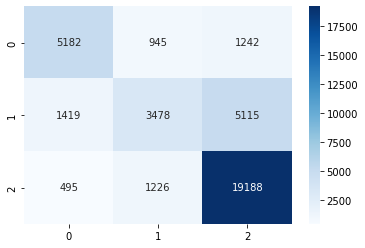

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print(accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(cf_matrix), annot = True, cmap = plt.cm.Blues, fmt='g')

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

rf = RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

CPU times: user 1min 33s, sys: 548 ms, total: 1min 33s
Wall time: 1min 34s


0.7033690258553147


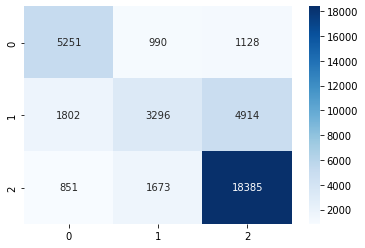

In [ ]:
print(accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(cf_matrix), annot = True, cmap = plt.cm.Blues, fmt='g')

In [ ]:
y_pred_test = catboost.predict(test_df)

submit = pd.DataFrame(y_pred_test, columns=['score'])
submit.to_csv('submit_v3.csv', index=False)